In [1]:
# Imported packages
import numpy as np
import statistics
from statistics import stdev 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
#data = data_orig.drop(['Year'], axis=1)
data = data_orig

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)

#Removing the commas from "volume" feaures
data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']]  = data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']].replace(',', '', regex=True)

#change objects to float
data['CORN_Volume'] = data.CORN_Volume.astype(float)
data['WEAT_Volume'] = data.WEAT_Volume.astype(float)
data['CANE_Volume'] = data.CANE_Volume.astype(float)
data['HSY_Volume'] = data.HSY_Volume.astype(float)
data['SJM_Volume'] = data.SJM_Volume.astype(float)
data['GIS_Volume'] = data.GIS_Volume.astype(float)
data['PEP_Volume'] = data.PEP_Volume.astype(float)
data['CPB_Volume'] = data.CPB_Volume.astype(float)


data.head(5)

,Month,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,January,2012,0.5,36.12,2.09,42.73,42.99,42.18,42.62,114100.0,...,66.86,67.19,66.36,66.40,5348800.0,33.50,33.69,32.93,32.98,1854500.0
2012-01-04,January,2012,0.5,36.12,2.09,42.79,42.95,42.20,42.51,43900.0,...,66.41,66.84,66.12,66.74,6042400.0,33.00,33.18,32.66,32.73,1721200.0
2012-01-05,January,2012,0.5,36.12,2.09,42.25,42.25,41.35,41.51,87400.0,...,66.58,66.67,66.12,66.22,4909100.0,32.69,32.73,31.80,31.81,4621400.0
2012-01-06,January,2012,0.5,36.12,2.09,41.72,41.80,41.26,41.35,31000.0,...,66.27,66.27,65.29,65.39,6533000.0,31.75,31.83,31.22,31.45,4981500.0
2012-01-09,January,2012,0.5,36.12,2.09,42.05,42.52,41.87,42.19,153700.0,...,65.26,65.83,65.01,65.73,5859600.0,31.53,31.91,31.50,31.83,1759800.0


In [3]:
#resample data monthly
data_month = data.resample('1M').mean()
data_month.head(5)

,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Volume,CPB_Open,CPB_High,CPB_Low,CPB_Close,CPB_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,2012,0.50,36.12,2.09,40.720000,40.960000,40.324000,40.692000,80610.000000,21.540000,...,65.713000,66.024500,65.318000,65.713500,6.035210e+06,32.047000,32.245000,31.769000,32.000000,2.365130e+06
2012-02-29,2012,0.49,37.51,1.85,40.672500,40.953500,40.368000,40.683000,37830.000000,21.396000,...,64.337500,64.584500,64.001500,64.281500,1.069150e+07,32.365000,32.653500,32.220000,32.421000,2.204535e+06
2012-03-31,2012,0.57,50.41,2.87,40.433182,40.689545,40.016364,40.267727,69286.363636,21.106818,...,64.212273,64.576364,64.023182,64.363182,6.296368e+06,32.960000,33.147727,32.810000,32.980000,1.668545e+06
2012-04-30,2012,0.71,54.68,2.23,38.630000,38.854500,38.233500,38.486500,43535.000000,20.317000,...,65.980500,66.303500,65.763000,66.039500,6.023460e+06,33.523500,33.699500,33.350500,33.545500,1.967345e+06
2012-05-31,2012,0.77,63.45,2.50,36.822273,37.153182,36.450455,36.770909,34081.818182,19.753182,...,67.401364,67.927727,67.112727,67.561364,8.494041e+06,33.455455,33.649091,33.213636,33.393182,2.120605e+06


### Calculations

In [4]:
#PROFIT
#calculate daily profit for each stock 
data['CORN_profit'] = data['CORN_Close'] * data['CORN_Volume']
data['WEAT_profit'] = data['WEAT_Close'] * data['WEAT_Volume']
data['CANE_profit'] = data['CANE_Close'] * data['CANE_Volume']
data['HSY_profit'] = data['HSY_Close'] * data['HSY_Volume']
data['SJM_profit'] = data['SJM_Close'] * data['SJM_Volume']
data['GIS_profit'] = data['GIS_Close'] * data['GIS_Volume']
data['PEP_profit'] = data['PEP_Close'] * data['PEP_Volume']
data['CPB_profit'] = data['CPB_Close'] * data['CPB_Volume']

#calculate monthly profit for each stock 
data_month['CORN_profit'] = data_month['CORN_Close'] * data_month['CORN_Volume']
data_month['WEAT_profit'] = data_month['WEAT_Close'] * data_month['WEAT_Volume']
data_month['CANE_profit'] = data_month['CANE_Close'] * data_month['CANE_Volume']
data_month['HSY_profit'] = data_month['HSY_Close'] * data_month['HSY_Volume']
data_month['SJM_profit'] = data_month['SJM_Close'] * data_month['SJM_Volume']
data_month['GIS_profit'] = data_month['GIS_Close'] * data_month['GIS_Volume']
data_month['PEP_profit'] = data_month['PEP_Close'] * data_month['PEP_Volume']
data_month['CPB_profit'] = data_month['CPB_Close'] * data_month['CPB_Volume']

#RETURN
#calculate daily return for stocks
#return = (p/p-1)-1

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

#fill in NaN
data['CORN_return'].fillna(method='bfill', inplace = True)
data['WEAT_return'].fillna(method='bfill', inplace = True)
data['CANE_return'].fillna(method='bfill', inplace = True)
data['HSY_return'].fillna(method='bfill', inplace = True)
data['SJM_return'].fillna(method='bfill', inplace = True)
data['GIS_return'].fillna(method='bfill', inplace = True)
data['PEP_return'].fillna(method='bfill', inplace = True)
data['CPB_return'].fillna(method='bfill', inplace = True)

#calculate monthly return for stocks
data_month['CORN_return'] = data_month['CORN_Close'].pct_change(1)
data_month['WEAT_return'] = data_month['WEAT_Close'].pct_change(1)
data_month['CANE_return'] = data_month['CANE_Close'].pct_change(1)
data_month['HSY_return'] = data_month['HSY_Close'].pct_change(1)
data_month['SJM_return'] = data_month['SJM_Close'].pct_change(1)
data_month['GIS_return'] = data_month['GIS_Close'].pct_change(1)
data_month['PEP_return'] = data_month['PEP_Close'].pct_change(1)
data_month['CPB_return'] = data_month['CPB_Close'].pct_change(1)

#fill in NaN
data_month['CORN_return'].fillna(method='bfill', inplace = True)
data_month['WEAT_return'].fillna(method='bfill', inplace = True)
data_month['CANE_return'].fillna(method='bfill', inplace = True)
data_month['HSY_return'].fillna(method='bfill', inplace = True)
data_month['SJM_return'].fillna(method='bfill', inplace = True)
data_month['GIS_return'].fillna(method='bfill', inplace = True)
data_month['PEP_return'].fillna(method='bfill', inplace = True)
data_month['CPB_return'].fillna(method='bfill', inplace = True)

#CUMULATIVE RETURN
#cumulative returns for daily data
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss
data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

#cumulative return for monthly data
data_month['CORN_cum_return'] = (1 + data_month['CORN_return']).cumprod()
data_month['WEAT_cum_return'] = (1 + data_month['WEAT_return']).cumprod()
data_month['CANE_cum_return'] = (1 + data_month['CANE_return']).cumprod()
data_month['HSY_cum_return'] = (1 + data_month['HSY_return']).cumprod()
data_month['SJM_cum_return'] = (1 + data_month['SJM_return']).cumprod()
data_month['GIS_cum_return'] = (1 + data_month['GIS_return']).cumprod()
data_month['PEP_cum_return'] = (1 + data_month['PEP_return']).cumprod()
data_month['CPB_cum_return'] = (1 + data_month['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

# Question 3
**3. What relationship (if any) exists between commodity stocks and company stocks?** <br/> 

### Correlation

Text(0.5,1,'Correlation Heatmap: Monthly Close')

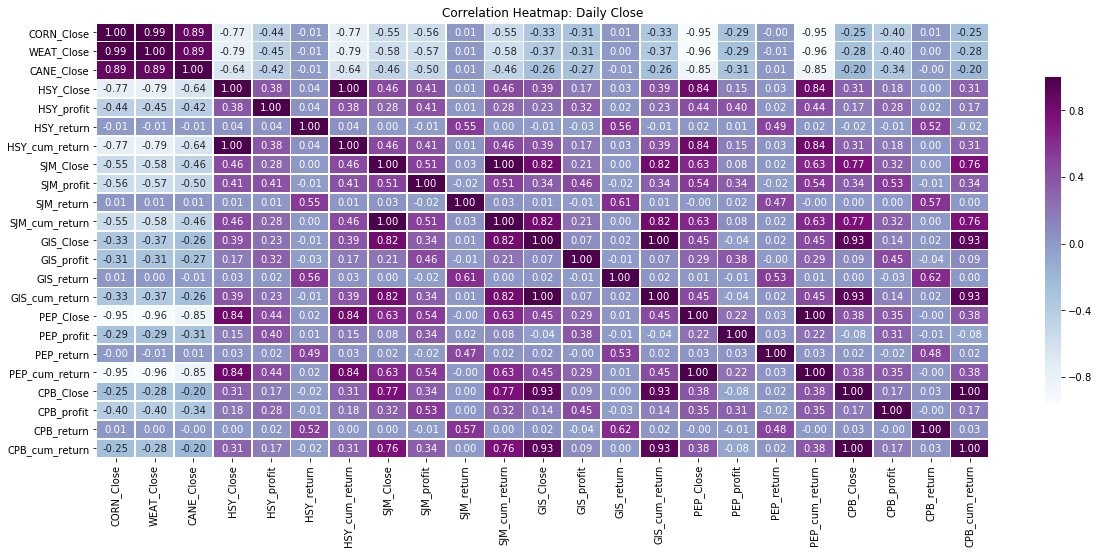

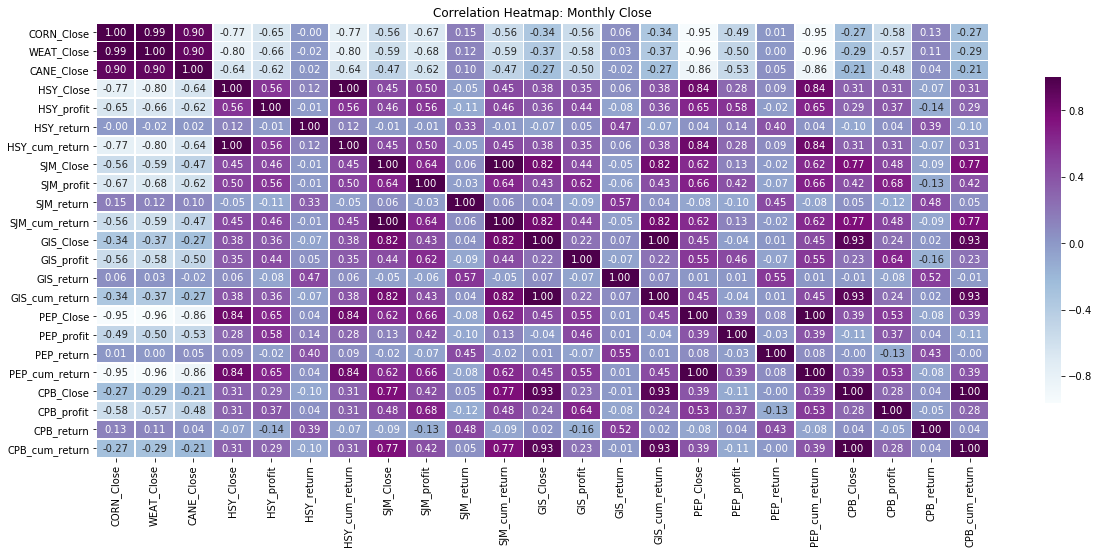

In [6]:
#correlation between daily stock_Close and company stocks

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Close')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Close')

### Covariance

In [7]:
#finding the covariance for all daily stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['CORN_Close'])
b = array(data['WEAT_Close'])
c = array(data['CANE_Close'])
d = array(data['HSY_Close'])
e = array(data['SJM_Close'])
f = array(data['GIS_Close'])
g = array(data['PEP_Close'])
h = array(data['CPB_Close'])

i = array(data['HSY_profit'])
j = array(data['SJM_profit'])
k = array(data['GIS_profit'])
l = array(data['PEP_profit'])
m = array(data['CPB_profit'])

n = array(data['HSY_return'])
o = array(data['SJM_return'])
p = array(data['GIS_return'])
q = array(data['PEP_return'])
r = array(data['CPB_return'])

s = array(data['HSY_cum_return'])
t = array(data['SJM_cum_return'])
u = array(data['GIS_cum_return'])
v = array(data['PEP_cum_return'])
w = array(data['CPB_cum_return'])

print('Daily Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Daily Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close -138.34084056629888
Covariance of CORN_Close and HSY_profit -216809511.61783123
Covariance of CORN_Close and HSY_return 0.0013902505081727602
Covariance of CORN_Close and HSY_cum_return -2.280583710892339
SJM
Covariance of CORN_Close and SJM_Close -115.94602149349058
Covariance of CORN_Close and SJM_profit -277570957.97993034
Covariance of CORN_Close and SJM_return 0.004010085491591711
Covariance of CORN_Close and SJM_cum_return -1.499560446608798
GIS
Covariance of CORN_Close and GIS_Close -40.9424700893594
Covariance of CORN_Close and GIS_profit -223430184.363508
Covariance of CORN_Close and GIS_return 0.002678570287678322
Covariance of CORN_Close and GIS_cum_return -1.021992461884887
PEP
Covariance of CORN_Close and PEP_Close -170.72475499919437
Covariance of CORN_Close and PEP_profit -360371356.472933
Covariance of CORN_Close and PEP_return 0.0006182257765834759
Covariance of CORN_Close and 

In [8]:
#Covariance measures for WEAT_Close v company
print('Daily Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Daily Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close -81.52090754236394
Covariance of WEAT_Close and HSY_profit -127094283.88983802
Covariance of WEAT_Close and HSY_return 0.0006718853978285041
Covariance of WEAT_Close and HSY_cum_return -1.3438927584741471
SJM
Covariance of WEAT_Close and SJM_Close -69.4502284620225
Covariance of WEAT_Close and SJM_profit -163894422.51800883
Covariance of WEAT_Close and SJM_return 0.001975258038665761
Covariance of WEAT_Close and SJM_cum_return -0.8982181041497866
GIS
Covariance of WEAT_Close and GIS_Close -24.314948083552398
Covariance of WEAT_Close and GIS_profit -134570443.49721462
Covariance of WEAT_Close and GIS_return 0.0013739427869931813
Covariance of WEAT_Close and GIS_cum_return -0.6069417306351325
PEP
Covariance of WEAT_Close and PEP_Close -99.46580656973128
Covariance of WEAT_Close and PEP_profit -204526679.46619472
Covariance of WEAT_Close and PEP_return 0.0002908683355706429
Covariance of WEAT_Clos

In [9]:
#Covariance measures for CANE_Close v company
print('Daily Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Daily Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close -60.72593514418214
Covariance of CANE_Close and HSY_profit -80686279.59535931
Covariance of CANE_Close and HSY_return 0.0005684599964837971
Covariance of CANE_Close and HSY_cum_return -1.0010823842880714
SJM
Covariance of CANE_Close and SJM_Close -39.14008396611875
Covariance of CANE_Close and SJM_profit -99842106.34881094
Covariance of CANE_Close and SJM_return 0.001138489231654761
Covariance of CANE_Close and SJM_cum_return -0.5062090189600348
GIS
Covariance of CANE_Close and GIS_Close -11.901257249738773
Covariance of CANE_Close and GIS_profit -87058307.20454338
Covariance of CANE_Close and GIS_return 0.00019359356852526876
Covariance of CANE_Close and GIS_cum_return -0.29707526609018386
PEP
Covariance of CANE_Close and PEP_Close -69.77612569308172
Covariance of CANE_Close and PEP_profit -154889208.58880845
Covariance of CANE_Close and PEP_return 0.00040048038673397215
Covariance of CANE_Clo

In [10]:
#finding the covariance for all monthly stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data_month['CORN_Close'])
b = array(data_month['WEAT_Close'])
c = array(data_month['CANE_Close'])
d = array(data_month['HSY_Close'])
e = array(data_month['SJM_Close'])
f = array(data_month['GIS_Close'])
g = array(data_month['PEP_Close'])
h = array(data_month['CPB_Close'])

i = array(data_month['HSY_profit'])
j = array(data_month['SJM_profit'])
k = array(data_month['GIS_profit'])
l = array(data_month['PEP_profit'])
m = array(data_month['CPB_profit'])

n = array(data_month['HSY_return'])
o = array(data_month['SJM_return'])
p = array(data_month['GIS_return'])
q = array(data_month['PEP_return'])
r = array(data_month['CPB_return'])

s = array(data_month['HSY_cum_return'])
t = array(data_month['SJM_cum_return'])
u = array(data_month['GIS_cum_return'])
v = array(data_month['PEP_cum_return'])
w = array(data_month['CPB_cum_return'])

print('Monthly Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close -139.9257771150918
Covariance of CORN_Close and HSY_profit -218281688.80480993
Covariance of CORN_Close and HSY_return 0.023814511454494015
Covariance of CORN_Close and HSY_cum_return -2.2533271569094335
SJM
Covariance of CORN_Close and SJM_Close -117.47825131715295
Covariance of CORN_Close and SJM_profit -281244028.86982906
Covariance of CORN_Close and SJM_return 0.07023293570328507
Covariance of CORN_Close and SJM_cum_return -1.43697649511411
GIS
Covariance of CORN_Close and GIS_Close -41.45661881468022
Covariance of CORN_Close and GIS_profit -226478451.8596663
Covariance of CORN_Close and GIS_return 0.04487741842356959
Covariance of CORN_Close and GIS_cum_return -0.9905287476890601
PEP
Covariance of CORN_Close and PEP_Close -172.9740819190508
Covariance of CORN_Close and PEP_profit -365535258.91022164
Covariance of CORN_Close and PEP_return 0.008495362691473657
Covariance of CORN_Close and

In [11]:
#Covariance measures for WEAT_Close v company
print('Monthly Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Monthly Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close -82.411932310207
Covariance of WEAT_Close and HSY_profit -127507565.15319
Covariance of WEAT_Close and HSY_return 0.010924078047333493
Covariance of WEAT_Close and HSY_cum_return -1.327139637575347
SJM
Covariance of WEAT_Close and SJM_Close -70.35085024030225
Covariance of WEAT_Close and SJM_profit -165899973.34124163
Covariance of WEAT_Close and SJM_return 0.03277347245303766
Covariance of WEAT_Close and SJM_cum_return -0.8605211353860762
GIS
Covariance of WEAT_Close and GIS_Close -24.63709229008642
Covariance of WEAT_Close and GIS_profit -136705378.66777596
Covariance of WEAT_Close and GIS_return 0.021952009396584732
Covariance of WEAT_Close and GIS_cum_return -0.5886574658171947
PEP
Covariance of WEAT_Close and PEP_Close -100.74104263109513
Covariance of WEAT_Close and PEP_profit -207319261.3562856
Covariance of WEAT_Close and PEP_return 0.003921186452018409
Covariance of WEAT_Close and PE

In [12]:
#Covariance measures for CANE_Close v company
print('Monthly Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close -61.3978401205173
Covariance of CANE_Close and HSY_profit -82302873.9480775
Covariance of CANE_Close and HSY_return 0.007489002043762219
Covariance of CANE_Close and HSY_cum_return -0.9887343373862423
SJM
Covariance of CANE_Close and SJM_Close -39.817934558257406
Covariance of CANE_Close and SJM_profit -101695064.85002534
Covariance of CANE_Close and SJM_return 0.013737568141872459
Covariance of CANE_Close and SJM_cum_return -0.48704705256242997
GIS
Covariance of CANE_Close and GIS_Close -12.106204385929487
Covariance of CANE_Close and GIS_profit -89323714.02815771
Covariance of CANE_Close and GIS_return -0.0011500698062298957
Covariance of CANE_Close and GIS_cum_return -0.28925522178417984
PEP
Covariance of CANE_Close and PEP_Close -70.69561994885484
Covariance of CANE_Close and PEP_profit -156534897.7409692
Covariance of CANE_Close and PEP_return 0.0024020581961953407
Covariance of CANE_Clo

### Granger Causality
- If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful.

In [13]:
#evaluation if the daily features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data[['CORN_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CORN_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CORN_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['CORN_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CORN_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data[['CORN_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CORN_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3680  , p=0.2423  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1.3701  , p=0.2418  , df=1
likelihood ratio test: chi2=1.3696  , p=0.2419  , df=1
parameter F test:         F=1.3680  , p=0.2423  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6590  , p=0.1906  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=3.3263  , p=0.1895  , df=2
likelihood ratio test: chi2=3.3235  , p=0.1898  , df=2
parameter F test:         F=1.6590  , p=0.1906  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8632  , p=0.1338  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=5.6090  , p=0.1323  , df=3
likelihood ratio test: chi2=5.6012  , p=0.1327  , df=3
parameter F test:         F=1.8632  , p=0.1338  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5298  , p=0.

In [14]:
#evaluation if the daily features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data[['WEAT_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['WEAT_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['WEAT_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['WEAT_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['WEAT_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data[['WEAT_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['WEAT_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['WEAT_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['WEAT_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['WEAT_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data[['WEAT_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['WEAT_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['WEAT_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['WEAT_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['WEAT_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data[['WEAT_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['WEAT_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['WEAT_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['WEAT_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['WEAT_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3873  , p=0.5338  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.3879  , p=0.5334  , df=1
likelihood ratio test: chi2=0.3878  , p=0.5334  , df=1
parameter F test:         F=0.3873  , p=0.5338  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1650  , p=0.8479  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.3308  , p=0.8476  , df=2
likelihood ratio test: chi2=0.3307  , p=0.8476  , df=2
parameter F test:         F=0.1650  , p=0.8479  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1682  , p=0.9178  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.5065  , p=0.9175  , df=3
likelihood ratio test: chi2=0.5064  , p=0.9175  , df=3
parameter F test:         F=0.1682  , p=0.9178  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2938  , p=0.

In [19]:
#evaluation if the daily features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data[['CANE_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CANE_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CANE_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['CANE_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data[['CANE_Close','HSY_return']], maxlag=4)) #reject null
print('SJM_return',grangercausalitytests(data[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data[['CANE_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3273  , p=0.2494  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1.3293  , p=0.2489  , df=1
likelihood ratio test: chi2=1.3288  , p=0.2490  , df=1
parameter F test:         F=1.3273  , p=0.2494  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1253  , p=0.0441  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=6.2662  , p=0.0436  , df=2
likelihood ratio test: chi2=6.2565  , p=0.0438  , df=2
parameter F test:         F=3.1253  , p=0.0441  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1376  , p=0.0935  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=6.4353  , p=0.0922  , df=3
likelihood ratio test: chi2=6.4250  , p=0.0927  , df=3
parameter F test:         F=2.1376  , p=0.0935  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0091  , p=0.

In [20]:
#evaluation if the monthly features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data_month[['CORN_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CORN_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CORN_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['CORN_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data_month[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CORN_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data_month[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CORN_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CORN_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5554  , p=0.2155  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=1.6062  , p=0.2050  , df=1
likelihood ratio test: chi2=1.5927  , p=0.2069  , df=1
parameter F test:         F=1.5554  , p=0.2155  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0929  , p=0.3397  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=2.3087  , p=0.3153  , df=2
likelihood ratio test: chi2=2.2808  , p=0.3197  , df=2
parameter F test:         F=1.0929  , p=0.3397  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5350  , p=0.0621  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=8.2242  , p=0.0416  , df=3
likelihood ratio test: chi2=7.8806  , p=0.0485  , df=3
parameter F test:         F=2.5350  , p=0.0621  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0023  , p=0.1017  , df_d

In [22]:
#evaluation if the monthly features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data_month[['WEAT_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['WEAT_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['WEAT_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['WEAT_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['WEAT_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data_month[['WEAT_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['WEAT_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['WEAT_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['WEAT_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['WEAT_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data_month[['WEAT_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['WEAT_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['WEAT_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['WEAT_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['WEAT_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data_month[['WEAT_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['WEAT_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['WEAT_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['WEAT_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['WEAT_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2064  , p=0.6506  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.2132  , p=0.6443  , df=1
likelihood ratio test: chi2=0.2129  , p=0.6445  , df=1
parameter F test:         F=0.2064  , p=0.6506  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3232  , p=0.7246  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.6828  , p=0.7108  , df=2
likelihood ratio test: chi2=0.6803  , p=0.7116  , df=2
parameter F test:         F=0.3232  , p=0.7246  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0225  , p=0.3868  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=3.3171  , p=0.3453  , df=3
likelihood ratio test: chi2=3.2593  , p=0.3533  , df=3
parameter F test:         F=1.0225  , p=0.3868  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7566  , p=0.5565  , df_d

In [23]:
#evaluation if the monthly features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data_month[['CANE_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CANE_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CANE_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['CANE_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data_month[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data_month[['CANE_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CANE_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3419  , p=0.5602  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.3530  , p=0.5524  , df=1
likelihood ratio test: chi2=0.3524  , p=0.5528  , df=1
parameter F test:         F=0.3419  , p=0.5602  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2597  , p=0.7719  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.5486  , p=0.7601  , df=2
likelihood ratio test: chi2=0.5470  , p=0.7607  , df=2
parameter F test:         F=0.2597  , p=0.7719  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8440  , p=0.1452  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=5.9821  , p=0.1125  , df=3
likelihood ratio test: chi2=5.7976  , p=0.1219  , df=3
parameter F test:         F=1.8440  , p=0.1452  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9770  , p=0.1056  , df_d